## 1. Setiment Analysis

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk


from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#!pip install wordcloud

In [3]:
data=pd.read_csv('../Datasets/Elon_musk.csv', encoding='Latin-1')

In [4]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [6]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Text processing

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

data["Text"] = data["Text"].apply(clean_text) # Clean The Text
data

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [8]:
## Word frequency

wordfrequency=pd.Series(' '.join(data['Text']).split()).value_counts()
wordfrequency

the             486
to              400
a               355
is              355
of              315
               ... 
carousel          1
joeingeneral      1
andrewbogut       1
typical           1
altho             1
Length: 4659, dtype: int64

## Removing Stopwords

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
## Word frequency

wordfrequency=pd.Series(' '.join(data['Text']).split()).value_counts()
wordfrequency

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
                 ... 
negati              1
carousel            1
joeingeneral        1
andrewbogut         1
altho               1
Length: 4536, dtype: int64

### Count vectoriser tells the frequency of a word.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(min_df=1, max_df=0.9)
vect_df=vect.fit_transform(data["Text"])

In [12]:
wordf_df=pd.DataFrame({'Term':vect.get_feature_names_out(),'Occurrences':np.asarray(vect_df.sum(axis=0)).ravel()})

In [13]:
wordf_df['frequency']=wordf_df['Occurrences']/np.sum(wordf_df['Occurrences'])

In [14]:
wordf_df

,Term,Occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
...,...,...,...
4456,zshauladventure,1,0.000075
4457,zubinanary,1,0.000075
4458,zwiebelbach,1,0.000075
4459,zzcool,1,0.000075


## Creating WordCloud




In [15]:
total_str=" ".join(data["Text"])

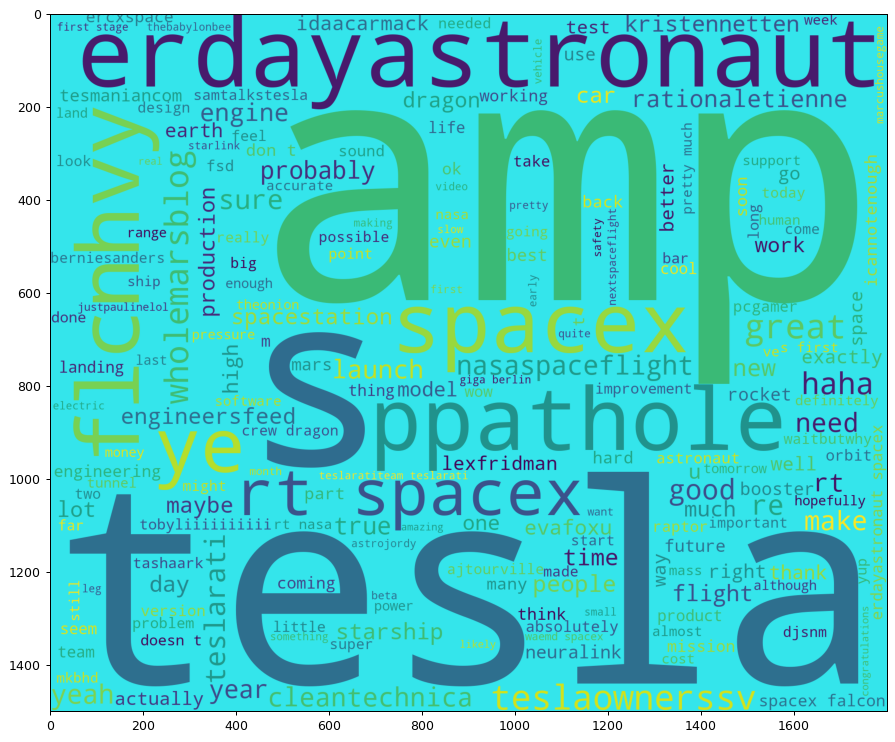

In [16]:
from wordcloud import wordcloud
plt.figure(figsize=(12,12),dpi=90)
wc=WordCloud(background_color='#34e5eb', width=1800, height=1500).generate(total_str)
plt.imshow(wc)

## Sentiment Analysis

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_vader_sentiment(text): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(text)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive sentiment'
    elif analysis["compound"] < 0: 
        return 'negative sentiment'
    else: 
        return 'neutral'


In [19]:
sid=SentimentIntensityAnalyzer()

In [20]:
data['scores'] = data['Text'].apply(lambda text: sid.polarity_scores(text))
data.head()

,Text,scores
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,idaacarmack ray tracing cyberpunk hdr nextleve...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,doge underestimated,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp..."
4,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou..."


In [21]:
data['compound']  = data['scores'].apply(lambda scores: scores['compound'])
data.head()

,Text,scores,compound
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,doge underestimated,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732
4,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.8271


In [22]:
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
data

,Text,scores,compound,comp_score
0,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,idaacarmack ray tracing cyberpunk hdr nextleve...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,pos
3,doge underestimated,"{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'comp...",-0.2732,neg
4,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.8271,pos
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,"{'neg': 0.31, 'neu': 0.38, 'pos': 0.31, 'compo...",-0.0000,pos
1995,ppathole make sure read ur terms amp condition...,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...",0.5994,pos
1996,teslagong ppathole samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1997,ppathole altho dumb dumber,"{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'comp...",-0.7003,neg
